## Theoritical

1. Can we use Bagging for regression problems?

Yes, Bagging (Bootstrap Aggregating) can be used for regression problems. A common example is the Bagging Regressor in scikit-learn, which uses multiple base regressors (e.g., Decision Trees) trained on different bootstrapped samples of the data and averages their predictions to improve accuracy and reduce variance.

2. What is the difference between multiple model training and single model training?

Single Model Training: A single algorithm is trained on the entire dataset, which may lead to high bias or variance.

Multiple Model Training (Ensemble Learning): Multiple models are trained on different data subsets or variations, and their outputs are combined, leading to better generalization.

3. Explain the concept of feature randomness in Random Forest.

Random Forest introduces randomness by selecting a random subset of features at each split, rather than using all available features. This reduces correlation between trees and improves generalization.

4. What is OOB (Out-of-Bag) Score?
The OOB Score is an internal cross-validation method in Bagging.

Since each base model is trained on a bootstrap sample (randomly selected with replacement), some data points are left out. These out-of-bag samples are used to estimate the model’s performance without requiring additional validation data.

5. How can you measure the importance of features in a Random Forest model?

Feature importance in Random Forest can be measured using:

Gini Importance (Mean Decrease in Impurity - MDI)

Permutation Importance, which shuffles feature values and observes performance changes.

6. Explain the working principle of a Bagging Classifier.

Draw bootstrap samples (random sampling with replacement).

Train multiple classifiers (e.g., Decision Trees).

Aggregate predictions using majority voting (for classification) or averaging (for regression).


7. How do you evaluate a Bagging Classifier’s performance?

Accuracy, Precision, Recall, F1-Score (for classification)

Mean Squared Error (MSE) or R² Score (for regression)

OOB Score, which provides an estimate without needing a separate validation set.

8. How does a Bagging Regressor work?

Similar to the Bagging Classifier, but instead of majority voting, it averages the predictions from different regressors to reduce variance and improve stability.

9. What is the main advantage of ensemble techniques?

Higher accuracy than single models

Reduced variance (e.g., Bagging)

Reduced bias (e.g., Boosting)

Better generalization to unseen data

10. What is the main challenge of ensemble methods?

Computational complexity (training multiple models)

Interpretability (difficult to explain how multiple models contribute to the final decision)

Risk of overfitting (especially with Boosting if not properly regularized)

11. Explain the key idea behind ensemble techniques.

Ensemble methods combine multiple weak learners (models) to create a stronger overall model that generalizes better than individual models.

12. What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble of multiple Decision Trees, trained on random subsets of data and features, with the final prediction made via majority voting.

13. What are the main types of ensemble techniques?

Bagging (Bootstrap Aggregating)

Boosting (e.g., AdaBoost, Gradient Boosting)

Stacking (Layered models with a meta-learner)

Voting/Averaging (Majority vote or mean prediction)

14. What is ensemble learning in machine learning?

Ensemble learning is a technique where multiple models (often of the same type) are trained and combined to improve performance compared to a single model.

15. When should we avoid using ensemble methods?

When computational resources are limited.

When the dataset is small, and a single model can generalize well.

When interpretability is a priority.

16. How does Bagging help in reducing overfitting?

Bagging reduces overfitting by:

Training multiple models on different random samples of the data.

Averaging their predictions, which smooths out noise in individual models.

17. Why is Random Forest better than a single Decision Tree?

Less prone to overfitting due to averaging multiple trees.

More stable and accurate since different feature subsets are used.

Handles missing data and noisy features better.

18. What is the role of bootstrap sampling in Bagging?

Bootstrap sampling allows each model in the ensemble to train on a slightly different dataset, leading to diverse predictions and improving generalization.

19. What are some real-world applications of ensemble techniques?

Fraud Detection (Bagging & Boosting)

Medical Diagnosis (Random Forest in disease prediction)

Stock Market Prediction (Stacking models)

Image Recognition (Boosting in deep learning)

20. What is the difference between Bagging and Boosting?

Bagging

Model Training: Independent models trained in parallel

Focus: Reducing variance

Overfitting:Less prone

Example: Random Forest


Boosting

 Model Training: Models trained sequentially, correcting previous errors

Focus: Reducing bias

Overfitting: More prone if overtrained

Example: AdaBoost, Gradient Boosting

PRACTICAL 

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier with Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 0.8850


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor with Decision Tree
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42) # Changed 'base_estimator' to 'estimator'
bagging_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Bagging Regressor MSE: {mse:.4f}")

Bagging Regressor MSE: 7109.3879


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

# Print feature importance
feature_importance = pd.Series(rf_clf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Feature Importance Scores:\n", feature_importance)


Feature Importance Scores:
 worst area                 0.139357
worst concave points       0.132225
mean concave points        0.107046
worst radius               0.082848
worst perimeter            0.080850
mean perimeter             0.067990
mean concavity             0.066917
mean area                  0.060462
worst concavity            0.037339
mean radius                0.034843
area error                 0.029553
worst compactness          0.019864
worst texture              0.017485
mean texture               0.015225
radius error               0.014264
worst smoothness           0.012232
mean compactness           0.011597
perimeter error            0.010085
worst symmetry             0.008179
mean smoothness            0.007958
fractal dimension error    0.005942
concavity error            0.005820
compactness error          0.005612
smoothness error           0.004722
worst fractal dimension    0.004497
concave points error       0.003760
texture error              0.003744


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"Decision Tree Regressor MSE: {dt_mse:.4f}")
print(f"Random Forest Regressor MSE: {rf_mse:.4f}")


Decision Tree Regressor MSE: 20519.2975
Random Forest Regressor MSE: 7055.5077


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [9]:
# Train Random Forest Classifier with OOB Score
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X, y)

# Print OOB Score
print(f"OOB Score: {rf_clf_oob.oob_score_:.4f}")


OOB Score: 0.9613


 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier with SVM
bagging_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=50, random_state=42)
bagging_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier (SVM) Accuracy: {accuracy:.4f}")


Bagging Classifier (SVM) Accuracy: 0.8450


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Test different numbers of trees
n_estimators_list = [10, 50, 100, 200]
accuracies = {}

for n in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[n] = acc

# Print accuracy comparison
for n, acc in accuracies.items():
    print(f"Random Forest (n_estimators={n}) Accuracy: {acc:.4f}")


Random Forest (n_estimators=10) Accuracy: 0.8550
Random Forest (n_estimators=50) Accuracy: 0.8800
Random Forest (n_estimators=100) Accuracy: 0.9000
Random Forest (n_estimators=200) Accuracy: 0.8900


 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Train Bagging Classifier with Logistic Regression
bagging_lr = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
bagging_lr.fit(X_train, y_train)

# Predict probabilities and evaluate AUC score
y_prob = bagging_lr.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

print(f"Bagging Classifier (Logistic Regression) AUC Score: {auc_score:.4f}")


Bagging Classifier (Logistic Regression) AUC Score: 0.9219


29. Train a Random Forest Regressor and analyze feature importance scores

In [15]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Print feature importance
feature_importance = pd.Series(rf_reg.feature_importances_).sort_values(ascending=False)
print("Feature Importance Scores:\n", feature_importance)


Feature Importance Scores:
 5     0.622626
14    0.120812
11    0.023921
18    0.022712
2     0.017346
12    0.016747
6     0.015655
1     0.015323
16    0.014729
15    0.014343
7     0.014086
17    0.013466
9     0.013125
19    0.012616
8     0.012249
3     0.011715
4     0.010561
13    0.010367
10    0.008883
0     0.008718
dtype: float64


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy

In [17]:
from sklearn.ensemble import VotingClassifier

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging_clf.predict(X_test))

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

# Create Voting Classifier (Ensemble of Bagging and Random Forest)
ensemble_clf = VotingClassifier(estimators=[
    ('bagging', bagging_clf),
    ('random_forest', rf_clf)
], voting='hard')

ensemble_clf.fit(X_train, y_train)
ensemble_acc = accuracy_score(y_test, ensemble_clf.predict(X_test))

print(f"Bagging Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")


Bagging Accuracy: 0.8850
Random Forest Accuracy: 0.9000
Ensemble Model Accuracy: 0.8950


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.89375


32. Train a Bagging Regressor with different numbers of base estimators and compare performance

In [19]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Test different numbers of base estimators
n_estimators_list = [10, 50, 100]
mse_scores = {}

for n in n_estimators_list:
    bagging_reg = BaggingRegressor(n_estimators=n, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[n] = mse

# Print MSE comparison
for n, mse in mse_scores.items():
    print(f"Bagging Regressor (n_estimators={n}) MSE: {mse:.4f}")


Bagging Regressor (n_estimators=10) MSE: 0.0974
Bagging Regressor (n_estimators=50) MSE: 0.0893
Bagging Regressor (n_estimators=100) MSE: 0.0862


33. Train a Random Forest Classifier and analyze misclassified samples

In [20]:
import numpy as np

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Find misclassified samples
misclassified = np.where(y_pred != y_test)[0]

print(f"Number of Misclassified Samples: {len(misclassified)}")
print("Misclassified Sample Indices:", misclassified)


Number of Misclassified Samples: 20
Misclassified Sample Indices: [  2   8  19  27  30  43  45  57  59  94  99 107 112 127 128 159 163 171
 173 184]


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt_clf.predict(X_test))

# Train Bagging Classifier with Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging_clf.predict(X_test))

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")


Decision Tree Accuracy: 0.8750
Bagging Classifier Accuracy: 0.8850


35. Train a Random Forest Classifier and visualize the confusion matrix

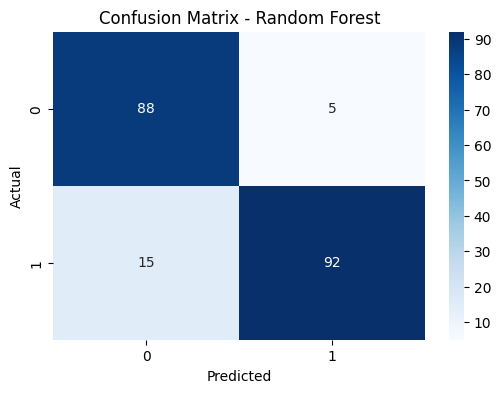

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define base estimators
base_estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train the model
stacking_clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, y_pred)

print(f"Stacking Classifier Accuracy: {stacking_acc:.4f}")


Stacking Classifier Accuracy: 0.8650


37. Train a Random Forest Classifier and print the top 5 most important features

In [24]:
import numpy as np

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Get top 5 features
top_features = np.argsort(feature_importances)[-5:][::-1]
print("Top 5 Important Features:", top_features)


Top 5 Important Features: [ 5 18  1 14 11]


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Precision: 0.8926
Recall: 0.8850
F1-score: 0.8850


39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

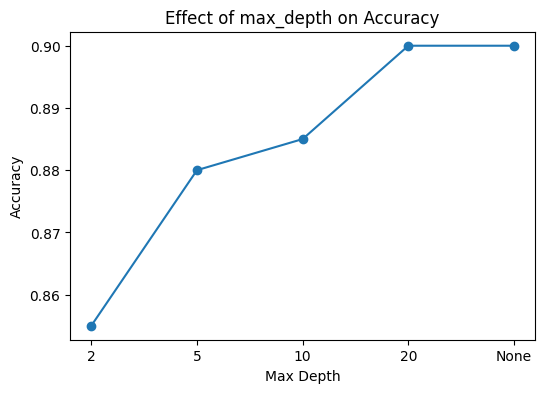

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

max_depths = [2, 5, 10, 20, None]
accuracy_scores = []

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot results
plt.figure(figsize=(6, 4))
plt.plot(max_depths[:-1] + ["None"], accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Accuracy")
plt.show()


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Train Bagging with DecisionTree
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Bagging with KNeighbors
bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Bagging Regressor (DecisionTree) MSE: {mse_dt:.4f}")
print(f"Bagging Regressor (KNeighbors) MSE: {mse_knn:.4f}")


Bagging Regressor (DecisionTree) MSE: 0.0893
Bagging Regressor (KNeighbors) MSE: 0.1362


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities for ROC-AUC score
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Random Forest ROC-AUC Score: {roc_auc:.4f}")


Random Forest ROC-AUC Score: 0.9379


42. Train a Bagging Classifier and evaluate its performance using cross-validation

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Define Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

print(f"Bagging Classifier Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Bagging Classifier Cross-Validation Accuracy: 0.9100 ± 0.0187


43. Train a Random Forest Classifier and plot the Precision-Recall Curve

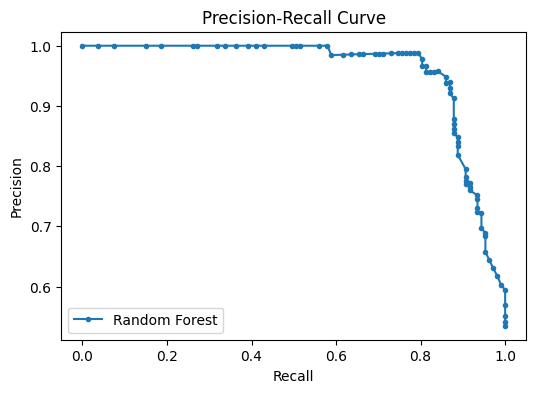

In [31]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train the model
stacking_clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, y_pred)

print(f"Stacking Classifier Accuracy: {stacking_acc:.4f}")


Stacking Classifier Accuracy: 0.9000


45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

bootstrap_levels = [True, False]  # True uses bootstrap sampling, False uses the whole dataset

for bootstrap in bootstrap_levels:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging Regressor (Bootstrap={bootstrap}) MSE: {mse:.4f}")


Bagging Regressor (Bootstrap=True) MSE: 0.0893
Bagging Regressor (Bootstrap=False) MSE: 0.1239
